<a href="https://colab.research.google.com/github/As1nth/cognifiz_internship/blob/main/Level3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
import re

sns.set_style("whitegrid")

In [ ]:
 from google.colab import files
 uploaded = files.upload()

Saving Dataset .csv to Dataset .csv


In [ ]:
 df = pd.read_csv("Dataset .csv")

 Positive reviews count: 3480
 Negative reviews count: 3923

 Average review length: 7.02 characters


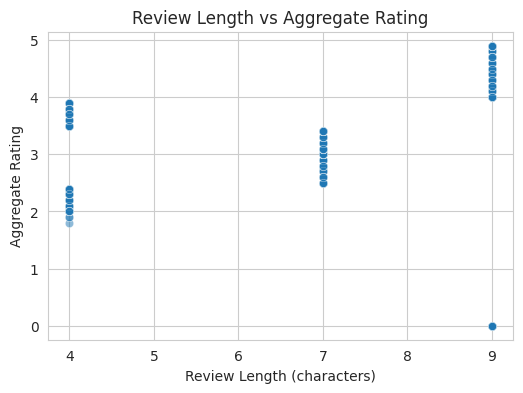

In [ ]:
#Task_One
positive_words = ["Excellent", "Very Good", "Good"]
negative_words = ["Poor", "Average", "Bad", "Not Rated"]

positive_count = df['Rating text'].isin(positive_words).sum()
negative_count = df['Rating text'].isin(negative_words).sum()

print(f" Positive reviews count: {positive_count}")
print(f" Negative reviews count: {negative_count}")

df['Review Length'] = df['Rating text'].astype(str).apply(len)
avg_review_length = df['Review Length'].mean()
print(f"\n Average review length: {avg_review_length:.2f} characters")
plt.figure(figsize=(6,4))
sns.scatterplot(x='Review Length', y='Aggregate rating', data=df, alpha=0.5)
plt.title("Review Length vs Aggregate Rating")
plt.xlabel("Review Length (characters)")
plt.ylabel("Aggregate Rating")
plt.show()


 Restaurant with highest votes:
Restaurant Name      Toit
Votes               10934
Aggregate rating      4.8
Name: 728, dtype: object

 Restaurant with lowest votes:
Restaurant Name     Cantinho da Gula
Votes                              0
Aggregate rating                 0.0
Name: 69, dtype: object

 Correlation between number of votes & rating: 0.31


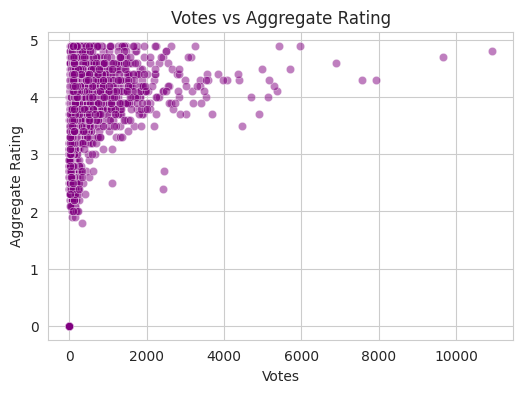

In [ ]:
# Task_Two
max_votes_restaurant = df.loc[df['Votes'].idxmax(), ['Restaurant Name', 'Votes', 'Aggregate rating']]
min_votes_restaurant = df.loc[df['Votes'].idxmin(), ['Restaurant Name', 'Votes', 'Aggregate rating']]

print("\n Restaurant with highest votes:")
print(max_votes_restaurant)
print("\n Restaurant with lowest votes:")
print(min_votes_restaurant)


correlation_votes_rating = df['Votes'].corr(df['Aggregate rating'])
print(f"\n Correlation between number of votes & rating: {correlation_votes_rating:.2f}")

plt.figure(figsize=(6,4))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df, alpha=0.5, color="purple")
plt.title("Votes vs Aggregate Rating")
plt.xlabel("Votes")
plt.ylabel("Aggregate Rating")
plt.show()


 Online Delivery % by Price Range:
Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369

 Table Booking % by Price Range:
Has Table booking         No        Yes
Price range                            
1                  99.977498   0.022502
2                  92.322518   7.677482
3                  54.261364  45.738636
4                  53.242321  46.757679


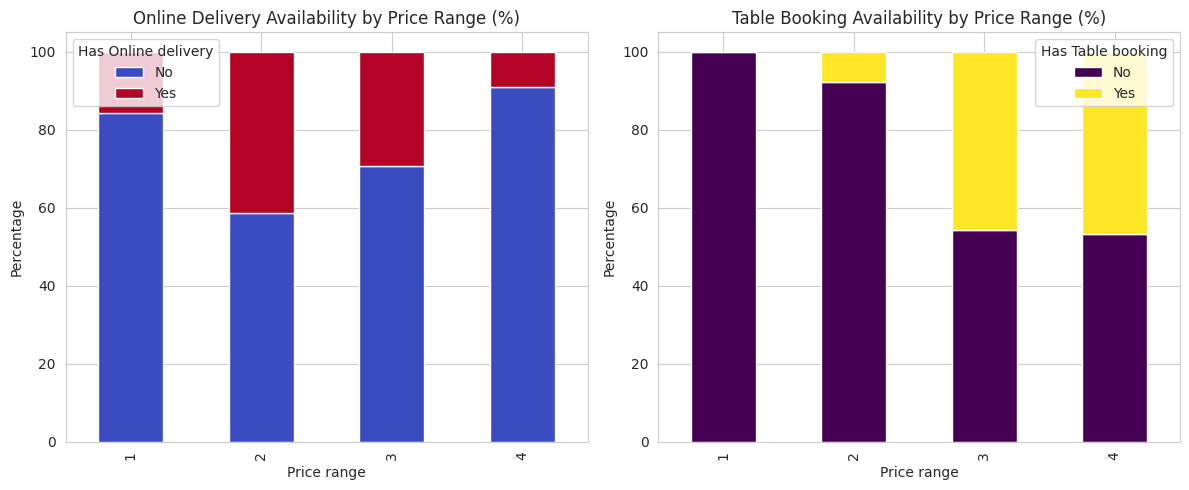

In [ ]:
# Task_three
online_delivery_by_price = pd.crosstab(df['Price range'], df['Has Online delivery'], normalize='index') * 100
table_booking_by_price = pd.crosstab(df['Price range'], df['Has Table booking'], normalize='index') * 100

print("\n Online Delivery % by Price Range:")
print(online_delivery_by_price)

print("\n Table Booking % by Price Range:")
print(table_booking_by_price)

fig, axes = plt.subplots(1, 2, figsize=(12,5))

online_delivery_by_price.plot(kind='bar', stacked=True, ax=axes[0], colormap="coolwarm")
axes[0].set_title("Online Delivery Availability by Price Range (%)")
axes[0].set_ylabel("Percentage")

table_booking_by_price.plot(kind='bar', stacked=True, ax=axes[1], colormap="viridis")
axes[1].set_title("Table Booking Availability by Price Range (%)")
axes[1].set_ylabel("Percentage")

plt.tight_layout()
plt.show()